# Analiza zbioru - House Prices - Advanced Regression Techniques

Maciej Wojciechowski

**Jaka jest zmienna docelowa (target variable), kt√≥rƒÖ chcemy
przewidywaƒá?**

Zmienna docelowa kt√≥rƒÖ chcemy przewidywaƒá to SalePrice, opis ka≈ºdej zmiennej mo≈ºemy znale≈∫ƒá na stronie https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


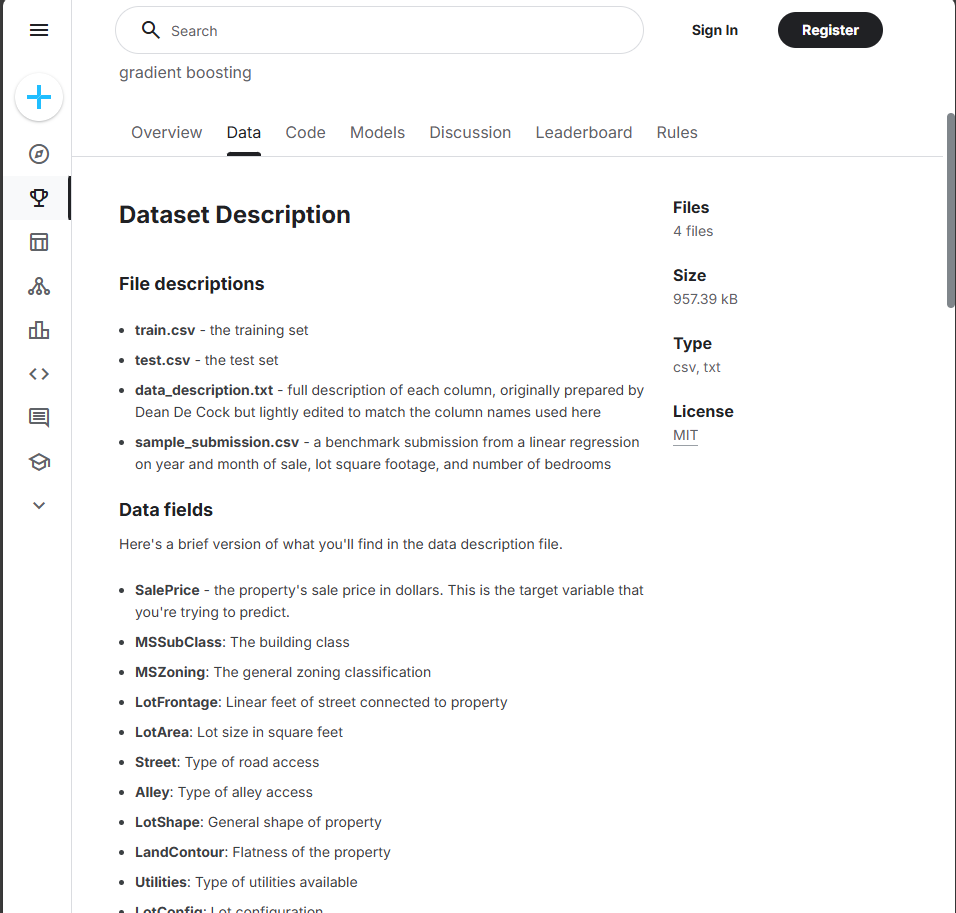

**Jakie rodzaje zmiennych masz w zbiorze? (numeryczne,
kategoryczne, tekstowe?)**


W tym celu:

In [13]:
import pandas as pd

#1. Wczytuje dane
df = pd.read_csv("train.csv")

#2. Sprawdzam  kszta≈Çt danych
print("Liczba wierszy i kolumn:", df.shape)

#3. Wy≈õwietlam pierwsze 5 wierszy
display(df.head())

#4. Sprawdzam typy danych
df.info()


Liczba wierszy i kolumn: (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Na tej podstawie mo≈ºemy wyciƒÖgnƒÖc nastƒôpujƒÖce wnioski:

*   mamy 1460 wierszy i 81 kolumn,
*   czyli 80 cech + SalePrice jako cel,
*   czƒô≈õƒá kolumn ma braki danych (np. Alley, FireplaceQu, PoolQC, Fence, MiscFeature),
*   sƒÖ r√≥≈ºne typy danych: liczby ca≈Çkowite (int64), zmiennoprzecinkowe (float64) i kategorie (object).



**‚Ä¢ Wy≈õwietl podstawowe statystyki opisowe**

W tym celu u≈ºyje metody describe() z atrybutem T aby transponowaƒá tabele

In [14]:

df.describe().T


count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

Z wy≈õwietlonych w ten spos√≥b danych mo≈ºemy miƒôdzy innymi wyczytaƒá nastƒôpujƒÖce informacje dotyczƒÖce zmiennej SalePrice

| Statystyka   | Znaczenie                                                             | Warto≈õƒá       |
| ------------ | --------------------------------------------------------------------- | ------------- |
| **count**    | liczba dom√≥w (czyli ile niepustych warto≈õci)                          | 1460          |
| **mean**     | ≈õrednia cena                                                          | ‚âà 180 921 USD |
| **std**      | odchylenie standardowe (czyli jak bardzo ceny siƒô r√≥≈ºniƒÖ miƒôdzy sobƒÖ) | ‚âà 79 442 USD  |
| **min**      | najta≈Ñszy dom                                                         | 34 900 USD    |
| **25% (Q1)** | 25% dom√≥w jest ta≈Ñszych ni≈º ta cena                                   | 129 975 USD   |
| **50% (Q2)** | mediana (≈õrodkowa warto≈õƒá)                                            | 163 000 USD   |
| **75% (Q3)** | 75% dom√≥w jest ta≈Ñszych ni≈º ta cena                                   | 214 000 USD   |
| **max**      | najdro≈ºszy dom                                                        | 755 000 USD   |


Na tej podstawie mo≈ºemy wysunƒÖƒá nastƒôpujƒÖce wnioski:

≈örednia cena domu w zbiorze to oko≈Ço 180 921 USD, a mediana 163 000 USD.

≈örednia jest wy≈ºsza ni≈º mediana, co oznacza, ≈ºe rozk≈Çad jest prawosko≈õny ‚Äì kilka bardzo drogich dom√≥w podnosi ≈õredniƒÖ.

Ceny wahajƒÖ siƒô od 34 900 USD do 755 000 USD, co pokazuje du≈ºe zr√≥≈ºnicowanie rynku nieruchomo≈õci.

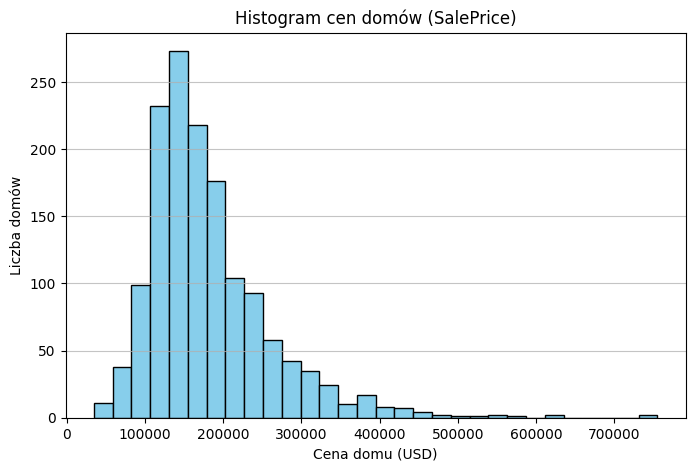

In [15]:
import matplotlib.pyplot as plt

# Ustawienia wykresu
plt.figure(figsize=(8,5))
plt.hist(df["SalePrice"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram cen dom√≥w (SalePrice)")
plt.xlabel("Cena domu (USD)")
plt.ylabel("Liczba dom√≥w")
plt.grid(axis="y", alpha=0.75)
plt.show()


Histogram cen dom√≥w pokazuje, ≈ºe rozk≈Çad jest asymetryczny (prawosko≈õny) ‚Äì wiƒôkszo≈õƒá dom√≥w ma ceny skupione w przedziale 100 000‚Äì200 000 USD, natomiast kilka nieruchomo≈õci osiƒÖga znacznie wy≈ºsze warto≈õci (nawet powy≈ºej 600 000 USD).

To potwierdza wniosek z wcze≈õniejszej analizy: kilka bardzo drogich dom√≥w zawy≈ºa ≈õredniƒÖ, przez co ≈õrednia jest wy≈ºsza ni≈º mediana.

Wykonamy teraz boxplot aby zwizualizowaƒá warto≈õci odstajƒÖce

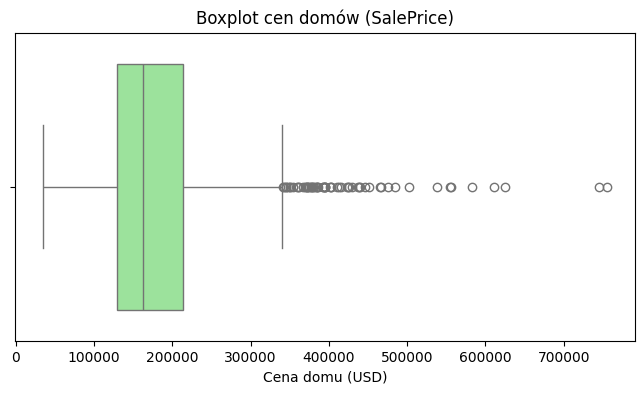

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df["SalePrice"], color="lightgreen")
plt.title("Boxplot cen dom√≥w (SalePrice)")
plt.xlabel("Cena domu (USD)")
plt.show()


Boxplot pokazuje, ≈ºe wiƒôkszo≈õƒá cen mie≈õci siƒô w przedziale od oko≈Ço 130 000 USD do 215 000 USD (czyli miƒôdzy kwartylem Q1 i Q3).
Widaƒá jednak kilka punkt√≥w znacznie wykraczajƒÖcych poza ten zakres ‚Äî to outliery, czyli pojedyncze bardzo drogie domy, kt√≥rych cena przekracza 400 000‚Äì700 000 USD.

Takie obserwacje mogƒÖ oznaczaƒá:

luksusowe nieruchomo≈õci o wyjƒÖtkowych cechach (np. du≈ºa dzia≈Çka, wysoka jako≈õƒá wyko≈Ñczenia),

albo potencjalne warto≈õci odstajƒÖce, kt√≥re mogƒÖ zaburzaƒá dzia≈Çanie modeli predykcyjnych.

Nastƒôpnym krokiem w naszej analizie bƒôdzie analiza liczby potencjalnych outliner√≥w

In [17]:
# Podstawowe statystyki
Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1  # zakres miƒôdzykwartylowy

minimum = df["SalePrice"].min()
maximum = df["SalePrice"].max()
mean = df["SalePrice"].mean()
median = df["SalePrice"].median()

print(f"Q1 (25%): {Q1:.0f}")
print(f"Mediana (50%): {median:.0f}")
print(f"Q3 (75%): {Q3:.0f}")
print(f"IQR: {IQR:.0f}")
print(f"Min: {minimum:.0f}")
print(f"Max: {maximum:.0f}")
print(f"≈örednia: {mean:.0f}")


Q1 (25%): 129975
Mediana (50%): 163000
Q3 (75%): 214000
IQR: 84025
Min: 34900
Max: 755000
≈örednia: 180921


In [18]:
# Granice dla outlier√≥w
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df["SalePrice"] > upper_bound]
print(f"Liczba potencjalnych outlier√≥w: {len(outliers)}")
display(outliers[["Id", "SalePrice"]].head())



Liczba potencjalnych outlier√≥w: 61


Id  SalePrice
11    12     345000
53    54     385000
58    59     438780
112  113     383970
151  152     372402

Podstawowe statystyki potwierdzajƒÖ, ≈ºe mediana ceny domu wynosi 163 000 USD, a ≈õrednia 180 921 USD.
Zakres miƒôdzykwartylowy (IQR) to ok. 84 000 USD, a wiƒôkszo≈õƒá cen mie≈õci siƒô miƒôdzy 130 000 a 214 000 USD.

Zgodnie z regu≈ÇƒÖ
ùëÑ
3
+
1.5
√ó
ùêº
ùëÑ
ùëÖ
Q3+1.5√óIQR, ceny powy≈ºej oko≈Ço 340 000 USD mo≈ºna uznaƒá za outliery.
Takich dom√≥w jest kilkana≈õcie ‚Äî sƒÖ to zapewne du≈ºe lub luksusowe nieruchomo≈õci, kt√≥re znaczƒÖco odstajƒÖ od reszty rynku.

# Co wp≈Çywa na cenƒô domu?

Zaczynamy od znalezienia zmiennych zwiƒÖzanych z powierzchniƒÖ


In [19]:
# Szukamy kolumn zawierajƒÖcych 'Area' lub 'SF'
area_cols = [c for c in df.columns if "Area" in c or "SF" in c]
print("Kolumny zwiƒÖzane z powierzchniƒÖ:")
print(area_cols)


Kolumny zwiƒÖzane z powierzchniƒÖ:
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea']


Najbardziej oczywista miara ‚Äûwielko≈õci domu‚Äù to GrLivArea (Ground Living Area).

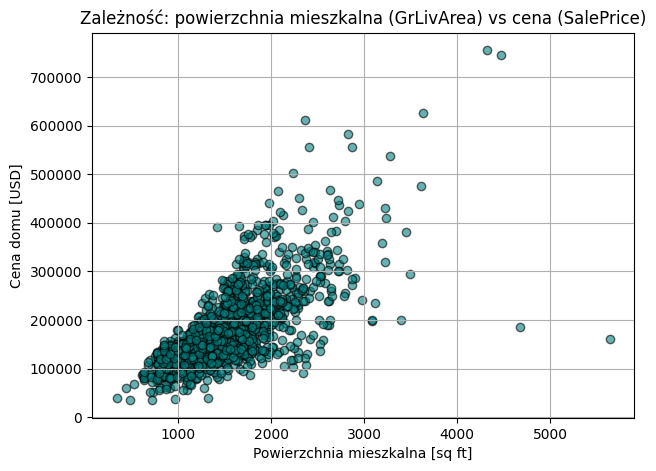

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(df["GrLivArea"], df["SalePrice"], alpha=0.6, color="teal", edgecolor="k")
plt.title("Zale≈ºno≈õƒá: powierzchnia mieszkalna (GrLivArea) vs cena (SalePrice)")
plt.xlabel("Powierzchnia mieszkalna [sq ft]")
plt.ylabel("Cena domu [USD]")
plt.grid(True)
plt.show()


Wykres rozrzutu pokazuje wyra≈∫nƒÖ dodatniƒÖ zale≈ºno≈õƒá miƒôdzy powierzchniƒÖ mieszkalnƒÖ (GrLivArea) a cenƒÖ (SalePrice).
Wiƒôksze domy sƒÖ generalnie dro≈ºsze, co potwierdza hipotezƒô.

Zale≈ºno≈õƒá wydaje siƒô prawie liniowa, chocia≈º dla bardzo du≈ºych dom√≥w widaƒá kilka odstajƒÖcych obserwacji ‚Äî du≈ºe nieruchomo≈õci sprzedane znacznie taniej ni≈º reszta.

Aby potwierdziƒá tezƒô sprawdzimy korelacjƒô dla pozosta≈Çych zmiennych

In [21]:
# Lista kolumn zwiƒÖzanych z powierzchniƒÖ
area_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
              'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
              'LowQualFinSF', 'GrLivArea', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'PoolArea']

# Tworzymy ramkƒô z korelacjami wzglƒôdem SalePrice
corrs = df[area_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)

# Usuwamy samƒÖ SalePrice, bo korelacja z samƒÖ sobƒÖ = 1
corrs = corrs.drop('SalePrice')

# Wy≈õwietlamy tabelƒô korelacji
corrs_df = corrs.reset_index()
corrs_df.columns = ['Zmienna', 'Korelacja z SalePrice']
corrs_df


Zmienna  Korelacja z SalePrice
0      GrLivArea               0.708624
1     GarageArea               0.623431
2    TotalBsmtSF               0.613581
3       1stFlrSF               0.605852
4     MasVnrArea               0.477493
5     BsmtFinSF1               0.386420
6     WoodDeckSF               0.324413
7       2ndFlrSF               0.319334
8    OpenPorchSF               0.315856
9        LotArea               0.263843
10     BsmtUnfSF               0.214479
11      PoolArea               0.092404
12    BsmtFinSF2              -0.011378
13  LowQualFinSF              -0.025606

Wizualizacja tabeli

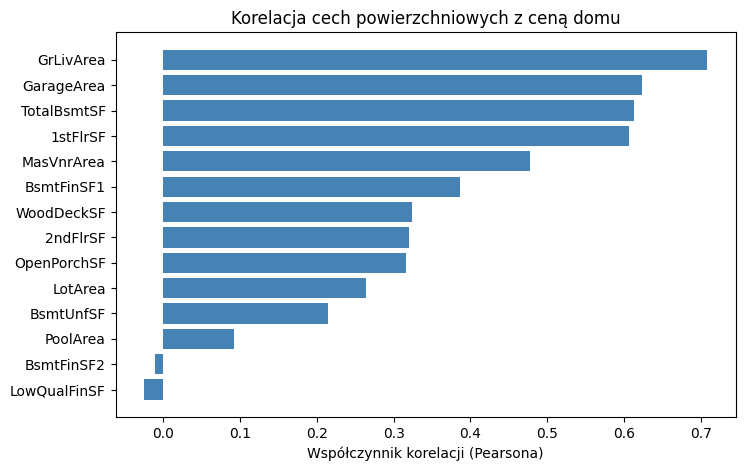

In [22]:
plt.figure(figsize=(8,5))
plt.barh(corrs_df['Zmienna'], corrs_df['Korelacja z SalePrice'], color='steelblue')
plt.gca().invert_yaxis()  # ≈ºeby najwy≈ºsze by≈Çy na g√≥rze
plt.title("Korelacja cech powierzchniowych z cenƒÖ domu")
plt.xlabel("Wsp√≥≈Çczynnik korelacji (Pearsona)")
plt.show()


Wnioski:

Najsilniej z cenƒÖ (SalePrice) koreluje powierzchnia mieszkalna nad ziemiƒÖ (GrLivArea), wsp√≥≈Çczynnik ‚âà 0.7 ‚Äî to bardzo mocna zale≈ºno≈õƒá dodatnia.
Oznacza to, ≈ºe im wiƒôkszy metra≈º u≈ºytkowy, tym zazwyczaj wy≈ºsza cena.

R√≥wnie≈º powierzchnia gara≈ºu (GarageArea), pierwszego piƒôtra (1stFlrSF) i ca≈Çkowita powierzchnia piwnicy (TotalBsmtSF) majƒÖ zauwa≈ºalny dodatni wp≈Çyw.

Z kolei powierzchnia dzia≈Çki (LotArea) ma znacznie s≈ÇabszƒÖ korelacjƒô (ok. 0.25), co sugeruje, ≈ºe sama wielko≈õƒá dzia≈Çki nie zawsze przek≈Çada siƒô na wy≈ºszƒÖ cenƒô.

# Analiza zmiennych o najwy≈ºszej korelacji z cenƒÖ

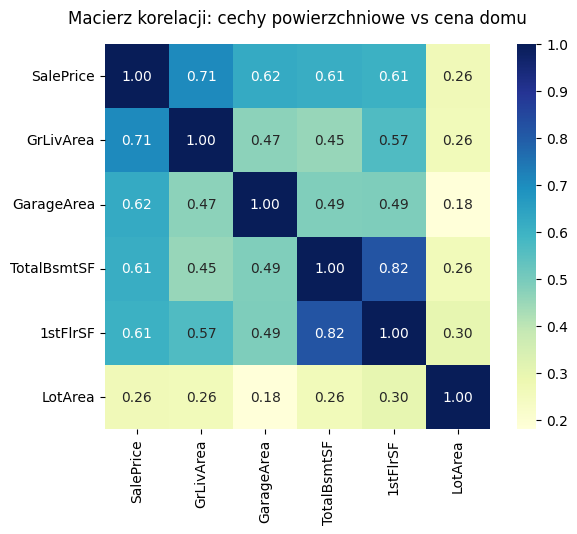

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wybieramy kolumny
cols = ['SalePrice', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea']

# Obliczamy macierz korelacji
corr_matrix = df[cols].corr()

# Tworzymy heatmapƒô
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Macierz korelacji: cechy powierzchniowe vs cena domu", pad=15)
plt.show()


Heatmapa potwierdza, ≈ºe:

GrLivArea (powierzchnia mieszkalna) ma najsilniejszy zwiƒÖzek z cenƒÖ ‚Äî wsp√≥≈Çczynnik ok. 0.7,

GarageArea, 1stFlrSF i TotalBsmtSF r√≥wnie≈º sƒÖ dodatnio skorelowane (ok. 0.6),

LotArea (powierzchnia dzia≈Çki) ma du≈ºo s≈ÇabszƒÖ korelacjƒô ‚Äî jej wp≈Çyw na cenƒô jest ograniczony,

wszystkie zale≈ºno≈õci sƒÖ dodatnie ‚Äî czyli wiƒôksza powierzchnia, wy≈ºsza cena.

Widaƒá wiƒôc wyra≈∫nie, ≈ºe najsilniejszym predyktorem ceny domu jest powierzchnia u≈ºytkowa (GrLivArea), co potwierdza naszƒÖ hipotezƒô:

‚ÄûWiƒôksze domy sƒÖ dro≈ºsze.‚Äù